In [1]:
import pandas as pd
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [5]:
engine = create_engine('postgresql://postgres:@localhost:5432/Learn')
connection = engine.connect()

#### 2.	Create a histogram to visualize the most common salary ranges for employees.

In [93]:
# Get Salary Data in a dataframe
salary = pd.read_sql('Select * from salary', connection)

Text(0.5, 1.0, 'Chart: Salary Distribution')

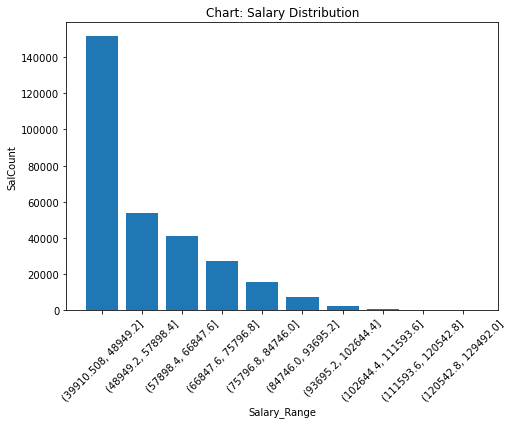

In [103]:
# Convert continous variable: Salary into Discreet variable: Salary Range with 20 salary buckets
salary_range = pd.cut(salary['salary'], bins = 10)
# add it as a separate column
salaryRange = salary.copy()
salaryRange['Salary_Range'] = salary_range
salaryRange['Count'] = 1
salaryRange = salaryRange[['Salary_Range', 'Count']]

# Group by on Salary_Range and get number of employees having that salary range
salary_binned = salaryRange.groupby('Salary_Range').agg(SalCount = ('Count', 'sum')).reset_index()
#salary_binned[['SalCount', 'Salary_Range']].plot(kind='bar', x='Salary_Range', y = 'SalCount')

salary_binned['Salary_Range'] = salary_binned['Salary_Range'].apply(lambda x: str(x))
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(salary_binned['Salary_Range'],salary_binned['SalCount'])
plt.xticks(rotation=45)
plt.xlabel("Salary_Range")
plt.ylabel("SalCount")
plt.title("Chart: Salary Distribution")

Text(0.5, 1.0, 'Chart: Salary Distribution')

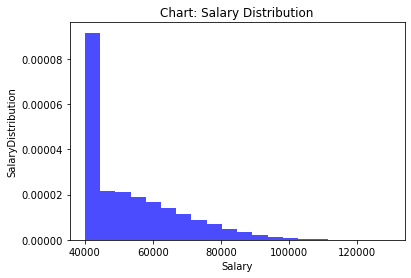

In [99]:
x = salary['salary']
num_bins = 20
plt.ticklabel_format(useOffset=False, style='plain')
n, bins, patches = plt.hist(x, num_bins,  
                            density = 1,  
                            color ='blue', 
                            alpha = 0.7) 

plt.xlabel("Salary")
plt.ylabel("SalaryDistribution")
plt.title("Chart: Salary Distribution")

#### 3.	Create a bar chart of average salary by title.

In [49]:
#Get Avg Salary for each Title from Postgres database
qry = 'Select title AS Title, SUM(salary) AS AvgSalary from employee e inner join salary s on e.emp_no = s.emp_no inner join title t on e.emp_title_id = t.title_id group by t.title'
Title_AvgSal = pd.read_sql(qry, connection)

Text(0.5, 1.0, 'Average Salary by Title')

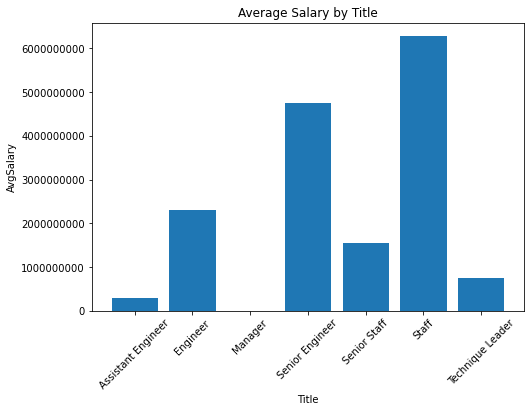

In [101]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.ticklabel_format(useOffset=False, style='plain')
ax.bar(Title_AvgSal['Title'],Title_AvgSal['AvgSalary'])
plt.xticks(rotation=45)
plt.xlabel("Title")
plt.ylabel("AvgSalary")
plt.title("Average Salary by Title")